In [1]:
#import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import  *
from pyspark.sql import SQLContext
#Zonder schema wordt de namen van de column onduidelijk zoals col1,col2 ....
chicago_crimes_schema = StructType([StructField("ID", StringType(), True),
                            StructField("CaseNumber", StringType(), True),
                            StructField("Date", StringType(), True ),
                            StructField("Block", StringType(), True),
                            StructField("IUCR", StringType(), True),
                            StructField("PrimaryType", StringType(), True  ),
                            StructField("Description", StringType(), True ),
                            StructField("LocationDescription", StringType(), True ),
                            StructField("Arrest", BooleanType(), True),
                            StructField("Domestic", BooleanType(), True),
                            StructField("Beat", StringType(), True),
                            StructField("District", StringType(), True),
                            StructField("Ward", StringType(), True),
                            StructField("CommunityArea", StringType(), True),
                            StructField("FBICode", StringType(), True ),
                            StructField("XCoordinate", DoubleType(), True),
                            StructField("YCoordinate", DoubleType(), True ),
                            StructField("Year", IntegerType(), True),
                            StructField("UpdatedOn", DateType(), True ),
                            StructField("Latitude", DoubleType(), True),
                            StructField("Longitude", DoubleType(), True),
                            StructField("Location", StringType(), True )
                            ])


boston_crimes_schema = StructType([StructField("INCIDENT_NUMBER", StringType(), True),
                            StructField("OFFENSE_CODE", StringType(), True),
                            StructField("OFFENSE_CODE_GROUP", StringType(), True),
                            StructField("OFFENSE_DESCRIPTION", StringType(), True),
                            StructField("DISTRICT", StringType(), True),
                            StructField("REPORTING_AREA", StringType(), True),
                            StructField("SHOOTING", StringType(), True),
                            StructField("OCCURRED_ON_DATE", TimestampType(), True),
                            StructField("YEAR", IntegerType(), True),
                            StructField("MONTH", IntegerType(), True),
                            StructField("DAY_OF_WEEK", StringType(), True),
                            StructField("HOUR", IntegerType(), True),
                            StructField("UCR_PART",StringType(), True),
                            StructField("STREET", StringType(), True),
                            StructField("Lat", StringType(), True),
                            StructField("Long", StringType(), True),
                            StructField("Location", StringType(), True)])


schema = StructType([StructField("ID Year", StringType(), True),
                            StructField("Year", StringType(), True),
                            StructField("Income", IntegerType(), True),
                            StructField("Household Income by Race Moe", StringType(), True),
                            StructField("Geography", StringType(), True),
                            StructField("ID Geography", StringType(), True),
                            StructField("Slug", StringType(), True)])


spark = SparkSession.builder.appName("Crimes in boston and chicago").getOrCreate()

bostoncrimes = spark.read.csv("./data/BostonData.csv", header = True, schema = boston_crimes_schema)



spark = SparkSession.builder.master("local[*]").config("spark.execute.memory", "1gb").appName("Analyzing Bosten and chicago Crime data").getOrCreate()

chicagocrimes = spark.read.csv("./data/Crimes_-_2001_to_present.csv",header = True,schema = chicago_crimes_schema)


#spark = SparkSession.builder.appName("Analyzing Bosten and chicago Income data").getOrCreate()

chicagoIncome = spark.read.csv("./data/ChicagoHouseholdIncome.csv",header = True,schema = schema)


#spark = SparkSession.builder.appName("Analyzing Bosten and Boston Income data").getOrCreate()

bostonIncome = spark.read.csv("./data/BostonHouseholdIncome.csv",header = True,schema = schema)

sc = spark.sparkContext
sqlContext = SQLContext(sc)

In [2]:
chicagocrimes.count()

6988852

In [3]:
chicagocrimes.columns

['ID',
 'CaseNumber',
 'Date',
 'Block',
 'IUCR',
 'PrimaryType',
 'Description',
 'LocationDescription',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'CommunityArea',
 'FBICode',
 'XCoordinate',
 'YCoordinate',
 'Year',
 'UpdatedOn',
 'Latitude',
 'Longitude',
 'Location']

In [4]:
bostoncrimes.count()

694876

In [5]:
bostoncrimes.columns

['INCIDENT_NUMBER',
 'OFFENSE_CODE',
 'OFFENSE_CODE_GROUP',
 'OFFENSE_DESCRIPTION',
 'DISTRICT',
 'REPORTING_AREA',
 'SHOOTING',
 'OCCURRED_ON_DATE',
 'YEAR',
 'MONTH',
 'DAY_OF_WEEK',
 'HOUR',
 'UCR_PART',
 'STREET',
 'Lat',
 'Long',
 'Location']

In [6]:
chicagocrimes.select('Date').show(10,truncate=False)

+----------------------+
|Date                  |
+----------------------+
|10/10/2019 11:39:00 PM|
|10/10/2019 11:38:00 PM|
|10/10/2019 11:34:00 PM|
|10/10/2019 11:31:00 PM|
|10/10/2019 11:30:00 PM|
|10/10/2019 11:30:00 PM|
|10/10/2019 11:24:00 PM|
|10/10/2019 11:23:00 PM|
|10/10/2019 11:20:00 PM|
|10/10/2019 11:15:00 PM|
+----------------------+
only showing top 10 rows



In [7]:
from datetime import datetime
from pyspark.sql.functions import col,udf
myfunc =  udf(lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p'), TimestampType())
df =chicagocrimes.withColumn('Date_time',myfunc(col('Date'))).drop('Date')
df.select(df["Date_time"]).show(5)

dg =bostoncrimes.withColumn('OCCURRED_ON_DATE',myfunc(col('OCCURRED_ON_DATE'))).drop('OCCURRED_ON_DATE')
#dg.select(df["OCCURRED_ON_DATE"]).show(5)

+-------------------+
|          Date_time|
+-------------------+
|2019-10-10 23:39:00|
|2019-10-10 23:38:00|
|2019-10-10 23:34:00|
|2019-10-10 23:31:00|
|2019-10-10 23:30:00|
+-------------------+
only showing top 5 rows



In [8]:
#data = df.groupBy('Year').count().show()
chicago_data =df.groupBy('Year').count().sort('Year').collect()
chicago_count = [item[1] for item in chicago_data]
chicago_year = [item[0] for item in chicago_data]
chicago_data

[Row(Year=2001, count=485760),
 Row(Year=2002, count=486758),
 Row(Year=2003, count=475949),
 Row(Year=2004, count=469390),
 Row(Year=2005, count=453717),
 Row(Year=2006, count=448120),
 Row(Year=2007, count=437027),
 Row(Year=2008, count=427071),
 Row(Year=2009, count=392724),
 Row(Year=2010, count=370354),
 Row(Year=2011, count=351819),
 Row(Year=2012, count=336051),
 Row(Year=2013, count=307178),
 Row(Year=2014, count=275395),
 Row(Year=2015, count=264247),
 Row(Year=2016, count=269203),
 Row(Year=2017, count=268371),
 Row(Year=2018, count=267527),
 Row(Year=2019, count=202191)]

In [9]:
#data = df.groupBy('Year').count().show()
boston_data =dg.groupBy('Year').count().sort('Year').collect()
boston_count = [item[1] for item in boston_data]
boston_year = [item[0] for item in boston_data]
boston_data

[Row(Year=2012, count=43186),
 Row(Year=2013, count=87052),
 Row(Year=2014, count=88058),
 Row(Year=2015, count=103357),
 Row(Year=2016, count=99430),
 Row(Year=2017, count=101338),
 Row(Year=2018, count=98888),
 Row(Year=2019, count=73567)]

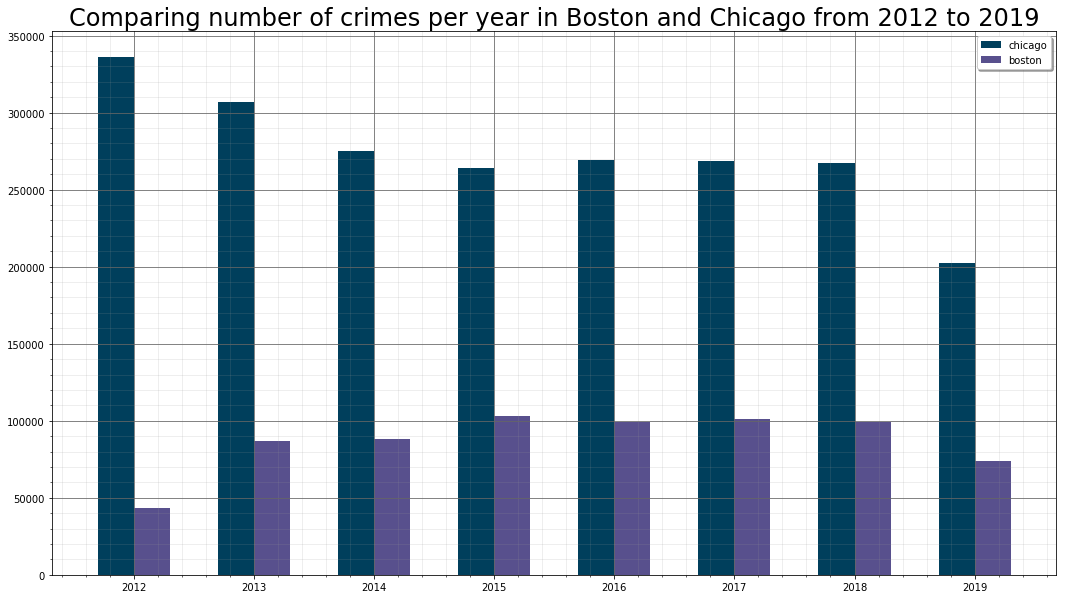

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

y_axis = [i for i in boston_count] 
x_axis= [i for i in chicago_count]
#z_axis = [i for i in boston_count]

fig = plt.figure(figsize=(18,10))
plt.title('Comparing number of crimes per year in Boston and Chicago from 2012 to 2019', fontsize=24)
#print(x_axis)
#print(y_axis)
#print(y_axis[14:])
data = [x_axis[11:],y_axis]

d = [2012,2013,2014,2015,2016,2017,2018,2019]
years = ['2012','2013','2014','2015','2016','2017','2018','2019']
X = np.arange(len(years))
plt.bar(X - 0.15, data[0], color = '#003f5c', width = 0.3,label='chicago')
plt.bar(X + 0.15, data[1], color = '#58508d', width = 0.3,label='boston')
ax = plt.gca()
ax.legend(shadow=True)
plt.xticks(X,(years))

# Show the major grid lines with dark grey lines
plt.grid(b=True, which='major', color='#666666', linestyle='-')

# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.show()

In [11]:
#data = df.groupBy('Year').count().show()
boston_data =dg.groupBy('MONTH').count().sort('MONTH').collect()
boston_month_count = [item[1] for item in boston_data]
boston_month = [item[0] for item in boston_data]
boston_data

[Row(MONTH=1, count=52246),
 Row(MONTH=2, count=47156),
 Row(MONTH=3, count=53388),
 Row(MONTH=4, count=52797),
 Row(MONTH=5, count=58392),
 Row(MONTH=6, count=61425),
 Row(MONTH=7, count=72966),
 Row(MONTH=8, count=70257),
 Row(MONTH=9, count=65730),
 Row(MONTH=10, count=57122),
 Row(MONTH=11, count=51839),
 Row(MONTH=12, count=51558)]

In [12]:
from pyspark.sql.functions import month
chicago_monthdf = df.withColumn("Month",month('Date_time'))
chicago_month_count = chicago_monthdf.select("Month").where(chicagocrimes['Year'] >= 2015).groupBy("Month").count()
chicago_month_count = chicago_month_count.collect()
chicago_month_count

[Row(Month=12, count=84413),
 Row(Month=1, count=103409),
 Row(Month=6, count=118411),
 Row(Month=3, count=105575),
 Row(Month=5, count=118617),
 Row(Month=9, count=114318),
 Row(Month=4, count=106333),
 Row(Month=8, count=123541),
 Row(Month=7, count=123518),
 Row(Month=10, count=99216),
 Row(Month=11, count=84325),
 Row(Month=2, count=89863)]

In [13]:
chicago_month_count.sort()
chicago_months = [item[0] for item in chicago_month_count]
chicago_month_counts = [item[1] for item in chicago_month_count]
chicago_month_count

[Row(Month=1, count=103409),
 Row(Month=2, count=89863),
 Row(Month=3, count=105575),
 Row(Month=4, count=106333),
 Row(Month=5, count=118617),
 Row(Month=6, count=118411),
 Row(Month=7, count=123518),
 Row(Month=8, count=123541),
 Row(Month=9, count=114318),
 Row(Month=10, count=99216),
 Row(Month=11, count=84325),
 Row(Month=12, count=84413)]

[52246, 47156, 53388, 52797, 58392, 61425, 72966, 70257, 65730, 57122, 51839, 51558]
[103409, 89863, 105575, 106333, 118617, 118411, 123518, 123541, 114318, 99216, 84325, 84413]
[84413]


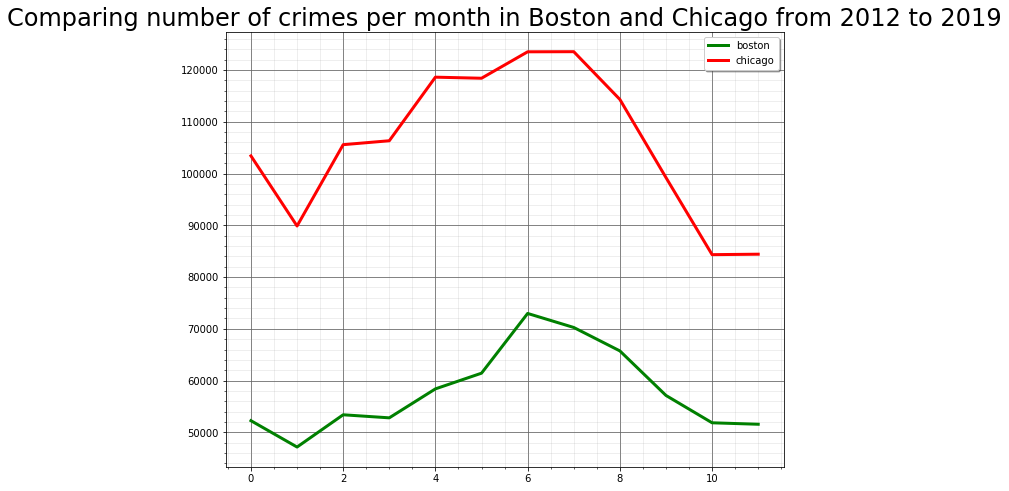

In [14]:
x_axis = [i for i in boston_month_count] 
y_axis= [i for i in chicago_month_counts]
#z_axis = [i for i in boston_count]

fig = plt.figure(figsize=(10,8))
plt.title('Comparing number of crimes per month in Boston and Chicago from 2012 to 2019', fontsize=24)
print(x_axis)
print(y_axis)
print(y_axis[11:])
data = [x_axis,y_axis]

d = [2015,2016,2017,2018,2019]
years = ['2012','2013','2014','2015','2016','2017','2018','2019']
X = np.arange(12)
plt.plot(X + 0.00, data[0], color = 'green',linewidth = 3, label='boston')
plt.plot(X + 0.00, data[1], color = 'red',linewidth = 3, label='chicago')
ax = plt.gca()
ax.legend(shadow=True)

# Show the major grid lines with dark grey lines
plt.grid(b=True, which='major', color='#666666', linestyle='-')

# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.show()

In [15]:
x_axis = [i for i in boston_month_count] 
y_axis= [i for i in chicago_month_counts]

In [16]:
crime_location  = chicagocrimes.groupBy("LocationDescription").count().sort('count', ascending  = False).limit(20).collect()
crime_location

[Row(LocationDescription=u'STREET', count=1823012),
 Row(LocationDescription=u'RESIDENCE', count=1183071),
 Row(LocationDescription=u'APARTMENT', count=729645),
 Row(LocationDescription=u'SIDEWALK', count=684130),
 Row(LocationDescription=u'OTHER', count=266486),
 Row(LocationDescription=u'PARKING LOT/GARAGE(NON.RESID.)', count=200625),
 Row(LocationDescription=u'ALLEY', count=155557),
 Row(LocationDescription=u'SCHOOL, PUBLIC, BUILDING', count=145233),
 Row(LocationDescription=u'RESIDENCE-GARAGE', count=134663),
 Row(LocationDescription=u'SMALL RETAIL STORE', count=125572),
 Row(LocationDescription=u'RESIDENCE PORCH/HALLWAY', count=122356),
 Row(LocationDescription=u'VEHICLE NON-COMMERCIAL', count=112737),
 Row(LocationDescription=u'RESTAURANT', count=112052),
 Row(LocationDescription=u'GROCERY FOOD STORE', count=90411),
 Row(LocationDescription=u'DEPARTMENT STORE', count=88010),
 Row(LocationDescription=u'GAS STATION', count=75415),
 Row(LocationDescription=u'RESIDENTIAL YARD (FRONT/

In [17]:
location = [item[0] for item in crime_location]
count = [item[1] for item in crime_location]
location

[u'STREET',
 u'RESIDENCE',
 u'APARTMENT',
 u'SIDEWALK',
 u'OTHER',
 u'PARKING LOT/GARAGE(NON.RESID.)',
 u'ALLEY',
 u'SCHOOL, PUBLIC, BUILDING',
 u'RESIDENCE-GARAGE',
 u'SMALL RETAIL STORE',
 u'RESIDENCE PORCH/HALLWAY',
 u'VEHICLE NON-COMMERCIAL',
 u'RESTAURANT',
 u'GROCERY FOOD STORE',
 u'DEPARTMENT STORE',
 u'GAS STATION',
 u'RESIDENTIAL YARD (FRONT/BACK)',
 u'CHA PARKING LOT/GROUNDS',
 u'PARK PROPERTY',
 u'COMMERCIAL / BUSINESS OFFICE']

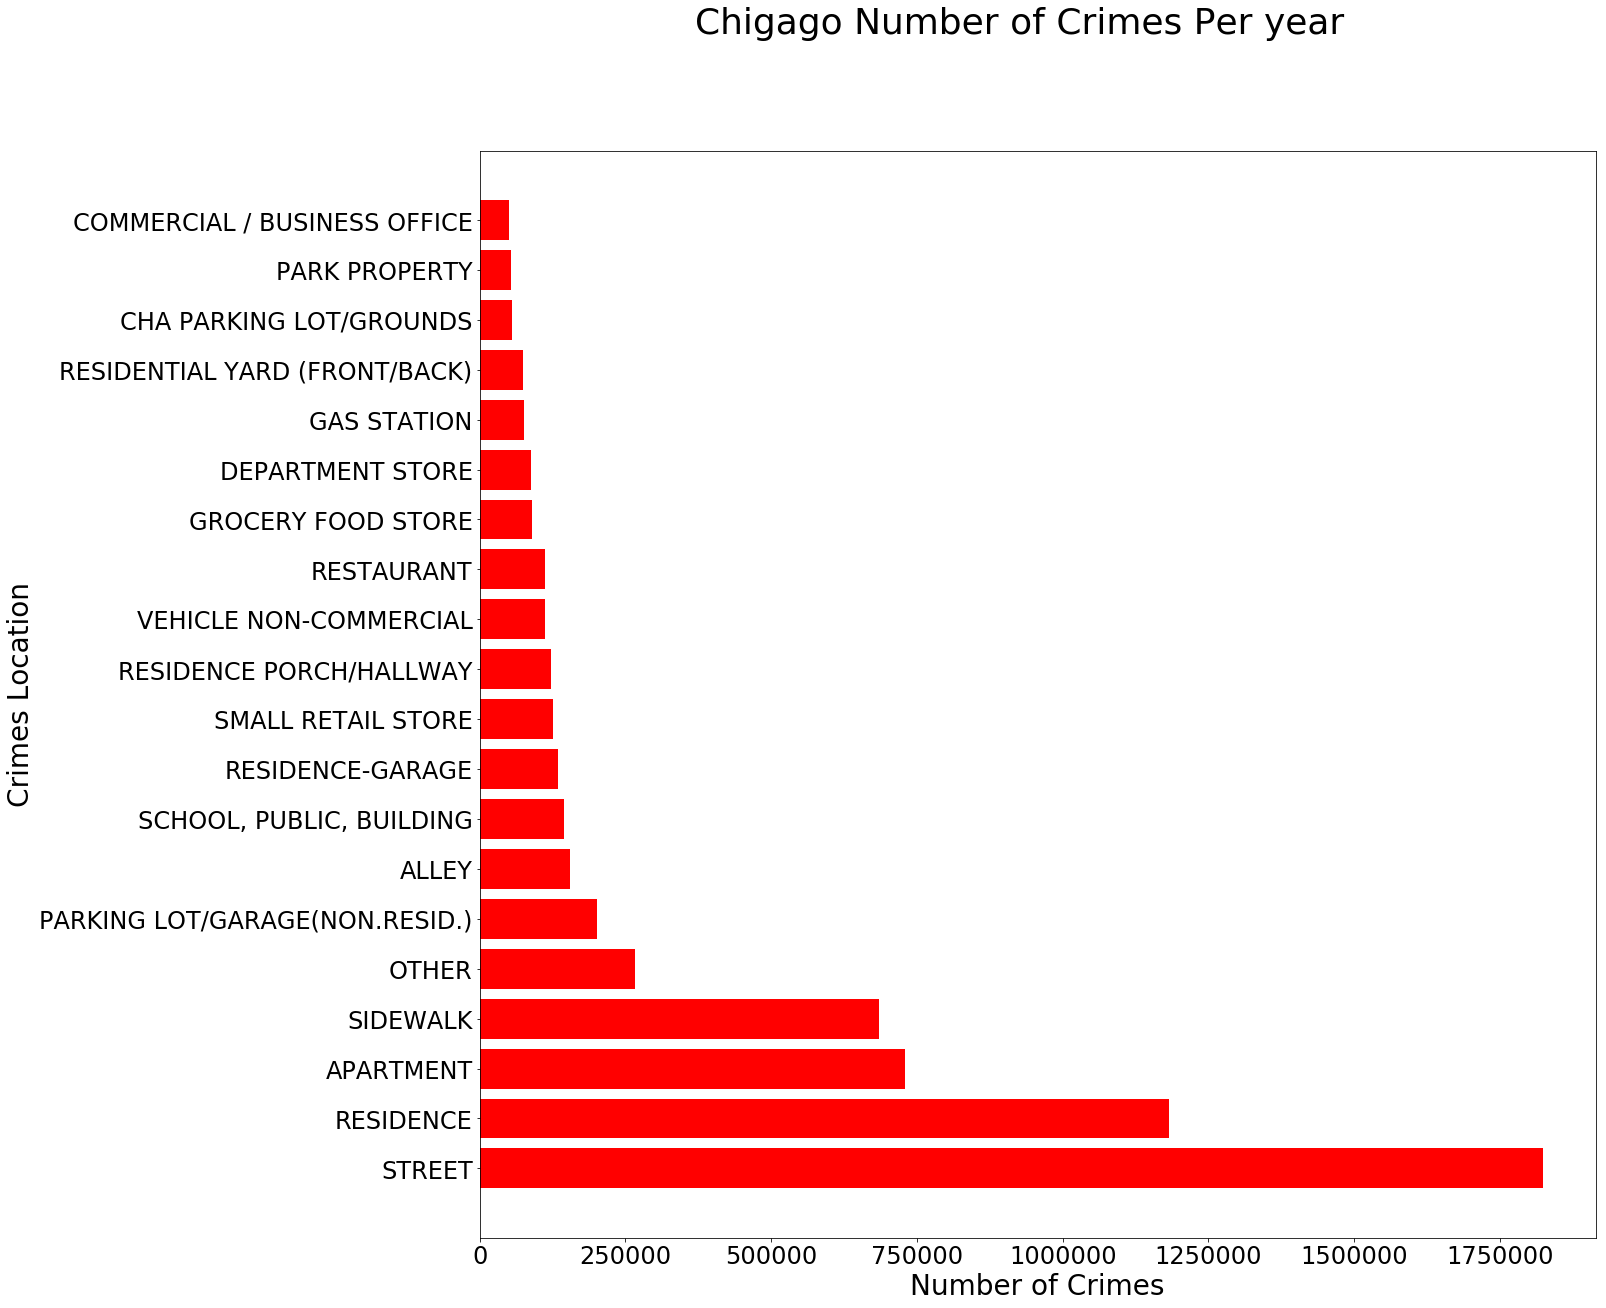

In [18]:
x_axis = [i for i in location] 
y_axis= [i for i in count]

fig = plt.figure(figsize=(20,20))
fig.suptitle('Chigago Number of Crimes Per year', fontsize=36)
 
plt.xlabel("Number of Crimes", fontsize = 28)
plt.ylabel("Crimes Location", fontsize = 28)
plt.barh(x_axis,y_axis,color = "red")
plt.xticks(size = 24)
plt.yticks(size = 24)
plt.show()

In [19]:
crime_long_lat  = bostoncrimes.groupBy("Lat","Long").count().sort('count', ascending  = False).limit(50).collect()
crime_long_lat.pop(0)
map_location = [[item[0],item[1],item[2]] for item in crime_long_lat]
long_lat=[[item[0],item[1]] for item in map_location]       
long_lat.pop(0)
count=[item[2] for item in map_location]
map_location

[[u'42.34862382', u'-71.08277637', 1671],
 [u'42.36183857', u'-71.05976489', 1651],
 [u'768218.0809', u'2945064.255', 1506],
 [u'42.28482577', u'-71.09137369', 1463],
 [u'42.32866284', u'-71.08563401', 1337],
 [u'42.25621592', u'-71.12401947', 1239],
 [u'42.29755533', u'-71.0597091', 1153],
 [u'42.34128751', u'-71.05467933', 1011],
 [u'774104.1328', u'2943918.604', 1008],
 [u'42.33152148', u'-71.07085307', 995],
 [u'-1', u'-1', 928],
 [u'42.33511904', u'-71.0749171', 902],
 [u'42.32696647', u'-71.06198607', 888],
 [u'42.33210843', u'-71.07014395', 872],
 [u'42.30971857', u'-71.10429432', 864],
 [u'42.32696802', u'-71.08051941', 851],
 [u'42.3523119', u'-71.0637051', 851],
 [u'766751.5911', u'2929095.955', 843],
 [u'42.33954199', u'-71.06940877', 841],
 [u'42.35512339', u'-71.0608798', 803],
 [u'42.33401829', u'-71.07638124', 766],
 [u'776551.5679', u'2949714.607', 735],
 [u'42.34285014', u'-71.06516235', 716],
 [u'774845.858', u'2938432.619', 714],
 [u'42.33428841', u'-71.07239518', 71

In [20]:
import folium
from folium.plugins import HeatMap
first_map = folium.Map(location=[41.885487535, -87.726422045], zoom_start=13)
test = HeatMap(crime_long_lat,name=None, min_opacity=0.5, max_zoom=18, max_val=1.0, radius=25, blur=10, gradient=None, overlay=True, control=True, show=True).add_to(first_map)

first_map

/usr/local/lib/python2.7/dist-packages/folium/__init__.py:59: UserWarning: This version of folium is the last to support Python 2. Transition to Python 3 to be able to receive updates and fixes. Check out https://python3statement.org/ for more info.
  UserWarning


RuntimeError: maximum recursion depth exceeded in cmp

In [21]:
from datetime import datetime
from pyspark.sql.functions import col,udf
myfunc =  udf(lambda x: datetime.strptime(x, '%Y %I'), TimestampType())

In [22]:
db =bostonIncome.withColumn('Date_time',myfunc(col('Year')))
dc =chicagoIncome.withColumn('Date_time',myfunc(col('Year')))
ddb =bostonIncome.withColumn('',myfunc(col('Year')))
db

DataFrame[ID Year: string, Year: string, Income: int, Household Income by Race Moe: string, Geography: string, ID Geography: string, Slug: string, Date_time: timestamp]

In [23]:
boston_income_data =db.groupBy('Year').sum("Income").sort('Year').collect()
db.registerTempTable("income")
#boston_income_data = sqlContext.sql("SELECT year, slug, Income FROM income WHERE slug LIKE 'boston%'").groupBy('Year').sum('Income').sort('Year').collect()
boston_income_count = [item[1] for item in boston_income_data]
boston_incoem_year = [item[0] for item in boston_income_data]
boston_income_data

[Row(Year=u'2013', sum(Income)=300255),
 Row(Year=u'2014', sum(Income)=309971),
 Row(Year=u'2015', sum(Income)=320237),
 Row(Year=u'2016', sum(Income)=340711),
 Row(Year=u'2017', sum(Income)=356629)]

In [24]:
chicago_income_data =dc.groupBy('Year').sum('Income').sort('Year').collect()
chicago_income_count = [item[1] for item in chicago_income_data]
chicago_income_year = [item[0] for item in chicago_income_data]
chicago_income_data

[Row(Year=u'2013', sum(Income)=346145),
 Row(Year=u'2014', sum(Income)=356517),
 Row(Year=u'2015', sum(Income)=367628),
 Row(Year=u'2016', sum(Income)=382557),
 Row(Year=u'2017', sum(Income)=397952)]

In [25]:
chicago_income_count

[346145, 356517, 367628, 382557, 397952]

In [26]:
chicagoIncome.columns

['ID Year',
 'Year',
 'Income',
 'Household Income by Race Moe',
 'Geography',
 'ID Geography',
 'Slug']

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

y_axis = [i for i in boston_income_count] 
x_axis= [i for i in chicago_income_count]
chicago_income_count[0] - boston_income_count[0]

45890

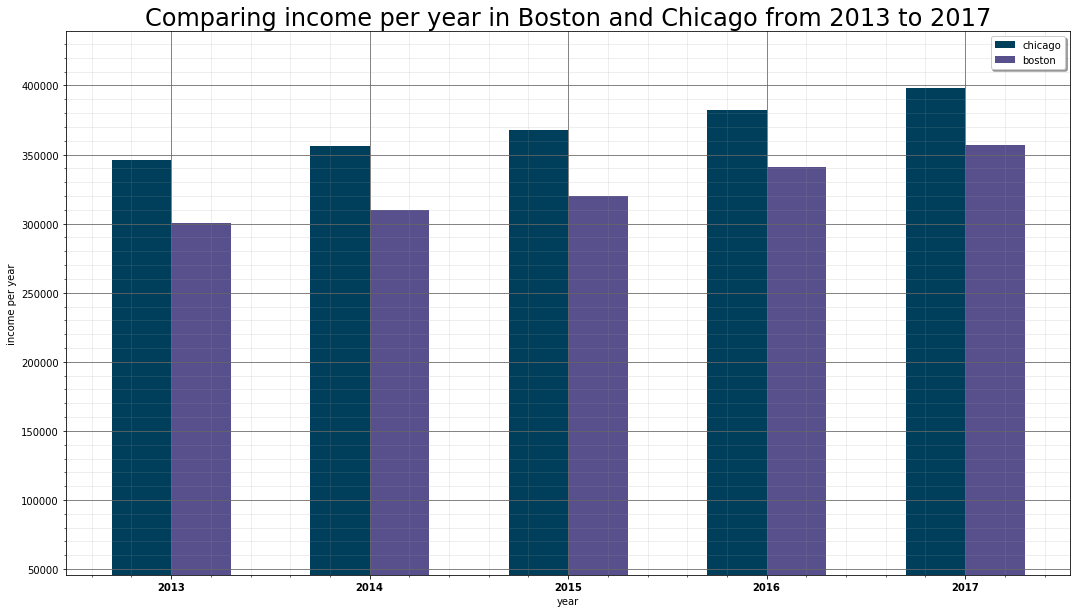

In [30]:
data = [x_axis,y_axis]

fig = plt.figure(figsize=(18,10))
plt.title('Comparing income per year in Boston and Chicago from 2013 to 2017', fontsize=24)

#bars = np.add(x_axis, y_axis).tolist()



 
# Names of group and bar width
names = ['2013','2014','2015','2016','2017']
#barWidth = 0.25
X = np.arange(len(names))
plt.bar(X - 0.15, data[0], color = '#003f5c', width = 0.3,label='chicago')
plt.bar(X + 0.15, data[1], color = '#58508d', width = 0.3,label='boston')
# Create green bars (top)
#plt.bar(r, bars3, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth)
 
ax = plt.gca()
ax.set_ylim(min(data[0]) - min(data[1]), max(data[0]) + (max(data[0]) - max(data[1])))
ax.legend(shadow=True)
    
# Custom X axis
plt.xticks(X, names, fontweight='bold')
plt.xlabel("year")
plt.ylabel("income per year")

# Show the major grid lines with dark grey lines
plt.grid(b=True, which='major', color='#666666', linestyle='-')

# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)


# Show graphic
plt.show()